## Importing Preprocessed Dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
stroke_data = pd.read_csv('dataset/preprocessed_stroke_data.csv')

In [28]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,Children,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,87.96,39.2,non-smoker,0
2,Female,8.0,0,0,No,Private,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,69.04,35.9,smoker,0
4,Male,14.0,0,0,No,Never Worked,161.28,19.1,NaN,0


In [29]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   avg_glucose_level  43400 non-null  float64
 7   bmi                43400 non-null  float64
 8   smoking_status     30108 non-null  object 
 9   stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 3.3+ MB


In [30]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.574551,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.639769,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


## Dataset Overview
- Data contains 4 Categorial Features
    - `gender`
    - `hypertension`
    - `heart_disease`
    - `ever_married`
- Data contains 6 Numerical Features
    - `age`
    - `avg_glucose_level`
    - `bmi`
    - `stroke`
    - `work_type`
    - `residence_type`
- Target Variable: `stroke`

## Data Scaling
- Numerical features are scaled using `StandardScaler` to ensure that they have a mean of 0 and a standard deviation of 1.
- Categorical features are encoded using `LabelEncoder` to convert them into a format suitable for machine learning algorithms.
- First we should do train-test split to avoid data leakage.


In [31]:
from sklearn.model_selection import train_test_split
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)



In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32550, 9), (10850, 9), (32550,), (10850,))

In [33]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
32002,Male,18.0,0,0,No,Private,56.56,33.3,smoker
4438,Female,78.0,0,0,Yes,Government Job,61.38,24.3,NaN
28947,Female,23.0,0,0,Yes,Private,92.45,21.4,smoker
27321,Female,50.0,0,0,Yes,Private,198.40,27.9,smoker
20265,Female,37.0,0,0,No,Private,94.10,45.0,NaN
...,...,...,...,...,...,...,...,...,...
13177,Female,79.0,0,0,Yes,Self Employed,69.94,26.3,smoker
26825,Male,50.0,1,0,Yes,Government Job,120.10,37.4,NaN
29307,Female,20.0,0,0,No,Private,80.02,29.0,smoker
41585,Male,53.0,0,0,Yes,Private,100.20,39.0,non-smoker


In [34]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
22806,Female,48.0,0,0,Yes,Private,71.80,24.5,non-smoker
8357,Female,8.0,0,0,No,Children,107.39,16.8,NaN
16073,Male,50.0,0,0,Yes,Government Job,55.40,27.3,non-smoker
29848,Female,40.0,0,0,Yes,Government Job,213.73,42.1,smoker
33144,Female,22.0,0,0,No,Private,93.17,29.0,non-smoker
...,...,...,...,...,...,...,...,...,...
38004,Female,9.0,0,0,No,Children,101.95,24.5,NaN
11068,Female,40.0,0,0,Yes,Private,84.11,24.8,non-smoker
38130,Female,48.0,0,0,No,Government Job,91.43,27.2,smoker
32666,Female,55.0,1,1,Yes,Self Employed,169.90,27.7,smoker


In [35]:
y_train

32002    0
4438     0
28947    0
27321    0
20265    0
        ..
13177    0
26825    0
29307    0
41585    0
21868    0
Name: stroke, Length: 32550, dtype: int64

In [36]:
y_test

22806    0
8357     0
16073    0
29848    0
33144    0
        ..
38004    0
11068    0
38130    0
32666    0
29049    0
Name: stroke, Length: 10850, dtype: int64

In [37]:
y_train.value_counts()

stroke
0    31963
1      587
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
numerical_cols = X_train_scaled.select_dtypes(exclude='object').columns
categorical_cols = X_train_scaled.select_dtypes(include='object').columns
scaler = StandardScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])
gender_le = LabelEncoder()
X_train_scaled['gender'] = gender_le.fit_transform(X_train_scaled['gender'])
X_test_scaled['gender'] = gender_le.transform(X_test_scaled['gender'])
work_type_le = LabelEncoder()
X_train_scaled['work_type'] = work_type_le.fit_transform(X_train_scaled['work_type'])
X_test_scaled['work_type'] = work_type_le.transform(X_test_scaled['work_type'])
ever_married_le = LabelEncoder()
X_train_scaled['ever_married'] = gender_le.fit_transform(X_train_scaled['ever_married'])
X_test_scaled['ever_married'] = gender_le.transform(X_test_scaled['ever_married'])
smoking_status_le = LabelEncoder()
X_train_scaled['smoking_status'] = smoking_status_le.fit_transform(X_train_scaled['smoking_status'])
X_test_scaled['smoking_status'] = smoking_status_le.transform(X_test_scaled['smoking_status'])

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_scaled,y_train = smote.fit_resample(X_train_scaled, y_train)

In [39]:
y_train.value_counts()

stroke
0    31963
1    31963
Name: count, dtype: int64

In [40]:
X_train_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,1,-1.078035,-0.320145,-0.224816,0,3,-1.113690,0.618408,1
1,0,1.584583,-0.320145,-0.224816,1,1,-1.001139,-0.561095,2
2,0,-0.856150,-0.320145,-0.224816,1,3,-0.275630,-0.941157,1
3,0,0.342028,-0.320145,-0.224816,1,3,2.198387,-0.089294,1
4,0,-0.234873,-0.320145,-0.224816,0,3,-0.237101,2.151761,2
...,...,...,...,...,...,...,...,...,...
63921,0,-0.086958,-0.320145,-0.224816,1,3,0.406637,-0.542750,1
63922,0,0.953648,-0.320145,-0.224816,1,1,2.170084,-0.183435,0
63923,1,1.405542,-0.320145,-0.224816,1,4,-0.578845,-0.063536,1
63924,0,0.350345,-0.320145,-0.224816,1,3,-0.189878,-0.142944,1


In [41]:
X_test_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
22806,0,0.253274,-0.320145,-0.224816,1,3,-0.757824,-0.534884,0
8357,0,-1.521805,-0.320145,-0.224816,0,0,0.073231,-1.544014,2
16073,1,0.342028,-0.320145,-0.224816,1,1,-1.140777,-0.167927,0
29848,0,-0.101742,-0.320145,-0.224816,1,1,2.556355,1.771699,1
33144,0,-0.900527,-0.320145,-0.224816,0,3,-0.258817,0.054868,0
...,...,...,...,...,...,...,...,...,...
38004,0,-1.477428,-0.320145,-0.224816,0,0,-0.053797,-0.534884,2
11068,0,-0.101742,-0.320145,-0.224816,1,3,-0.470375,-0.495567,0
38130,0,0.253274,-0.320145,-0.224816,0,1,-0.299448,-0.181033,1
32666,0,0.563912,3.123584,4.448083,1,4,1.532889,-0.115505,1


In [42]:
import pickle
pickle.dump(scaler, open('models/scaler.pkl', 'wb'))
pickle.dump(gender_le, open('models/gender_le.pkl', 'wb'))
pickle.dump(work_type_le, open('models/work_type_le.pkl', 'wb'))
pickle.dump(ever_married_le, open('models/ever_married_le.pkl', 'wb'))
pickle.dump(smoking_status_le, open('models/smoking_status_le.pkl', 'wb'))

## Box Plot Analysis

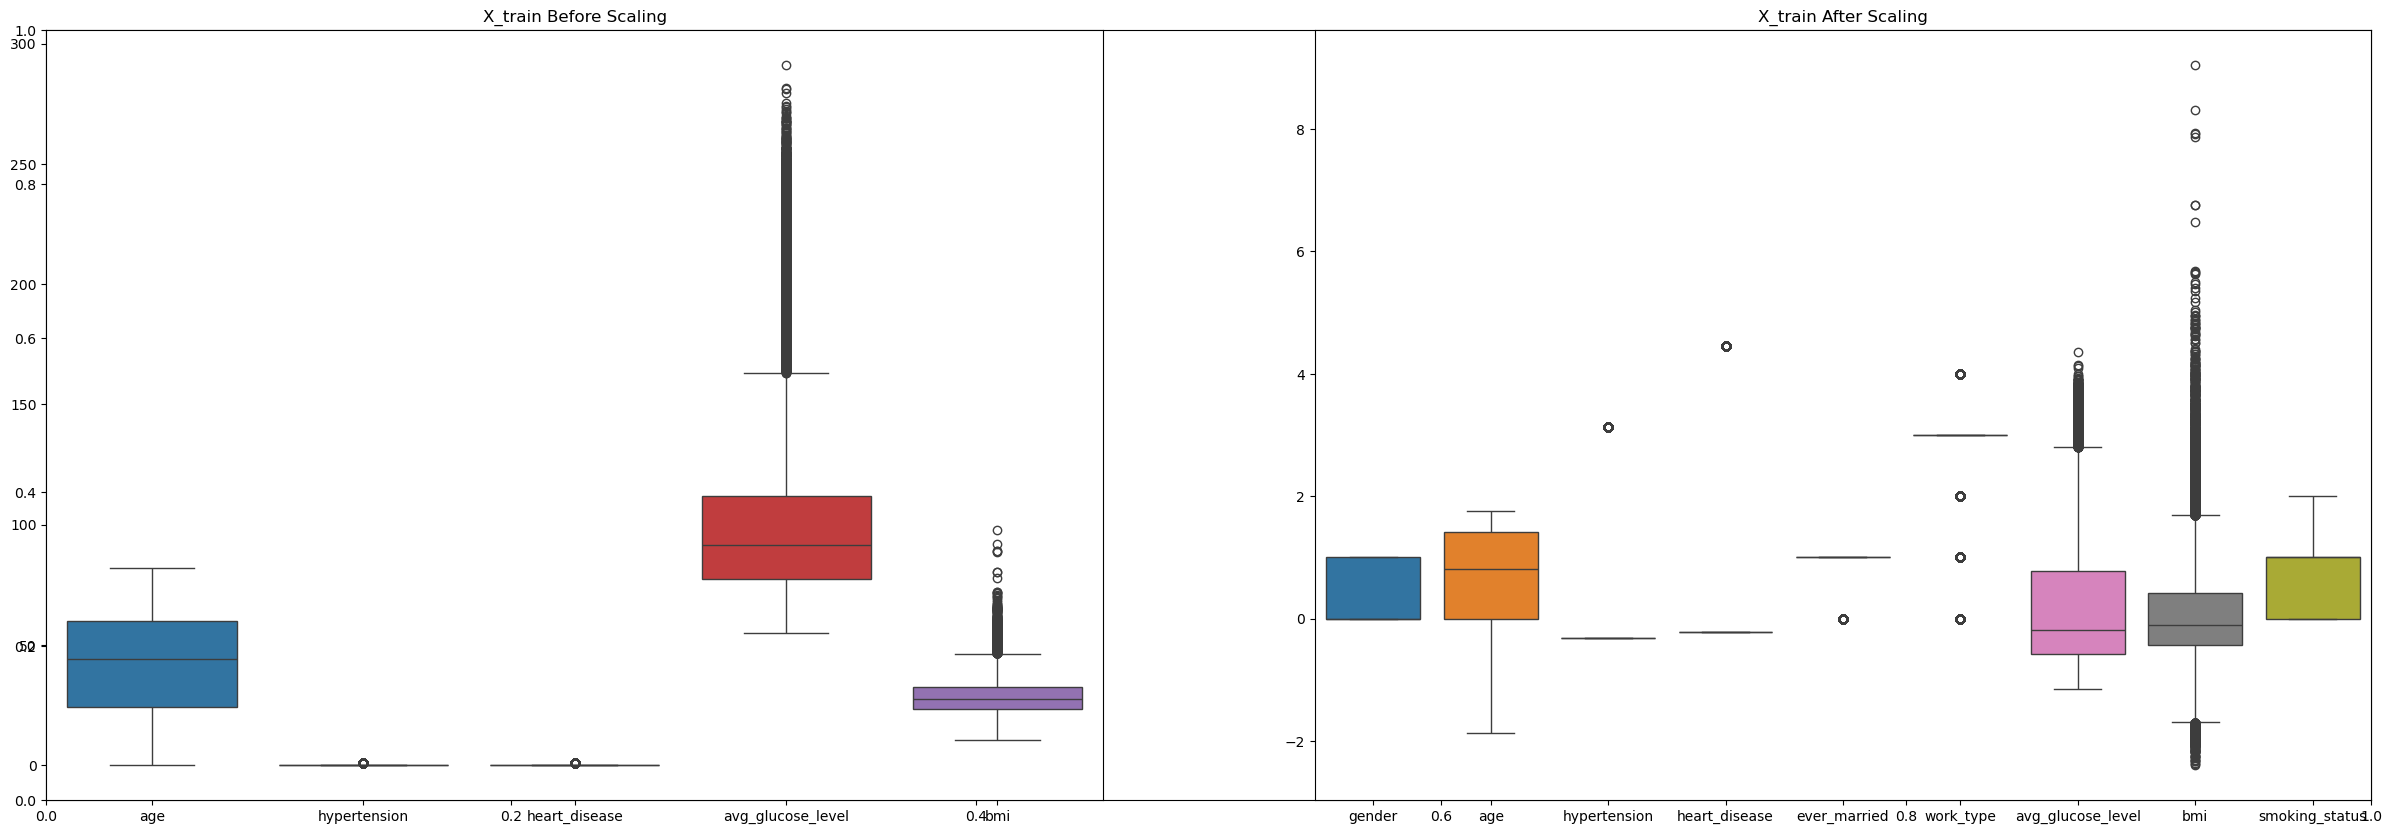

In [43]:
plt.subplots(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

## Heatmap Analysis

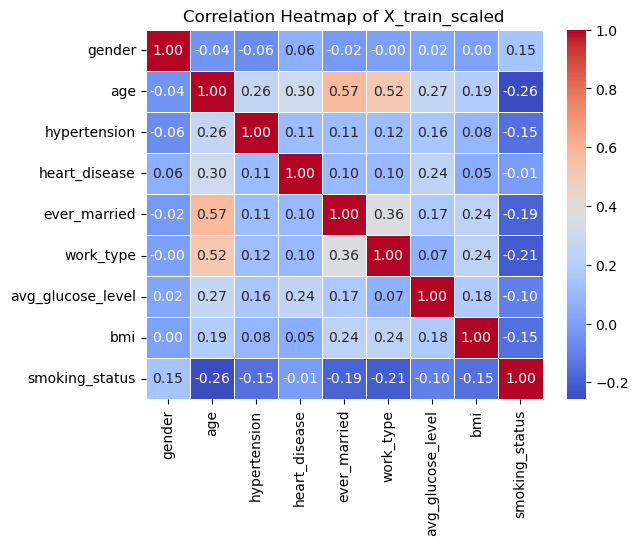

In [44]:
sns.heatmap(X_train_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of X_train_scaled')
plt.show()

## Model Training With Hyperparameter Tuning
| Model                            | Type                       |
| -------------------------------- | -------------------------- |
| **Logistic Regression**          | Linear / Probabilistic     |
| **Support Vector Machine (SVM)** | Margin-based Classifier    |
| **K-Nearest Neighbors (KNN)**    | Instance-Based             |
| **Random Forest**                | Ensemble (Bagging)         |
| **XGBoost**                      | Ensemble (Boosting)        |
| **Naive Bayes**                  | Probabilistic / Generative |

## Logistic Regression With Hyperparameter Tuning
- Logistic Regression is a statistical method for predicting binary classes.
- It is used to model the relationship between a dependent binary variable and one or more independent variables
- Hyperparameter tuning is done using `GridSearchCV` to find the best parameters for the model.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logistic_model = LogisticRegression(random_state=42,class_weight='balanced')
param_grid_logreg = [
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['none'],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    }
]
grid_search_logistic = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid_logreg,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [46]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(
    action="ignore",          # what to do
    category=ConvergenceWarning  # which warning class to silence
)
grid_search_logistic.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 372 candidates, totalling 1860 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 500, 1000], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 500, 1000], 'penalty': ['l1'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.5, 0.9],
                          'max_iter': [100, 500, 1000],
                          'penalty': ['elasticnet'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'max_iter': [100, 500, 1000], 'penalty': ['none'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}],
             scoring='accuracy', verbose=1)

In [47]:
y_predicted_logistic = grid_search_logistic.predict(X_test_scaled)

In [48]:
print("Best Params:", grid_search_logistic.best_params_)
print("Best CV Accuracy:", grid_search_logistic.best_score_)

print("Test Accuracy:", accuracy_score(y_test, y_predicted_logistic))
print(classification_report(y_test, y_predicted_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_logistic))


Best Params: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best CV Accuracy: 0.7805744391551647
Test Accuracy: 0.7528110599078341
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     10654
           1       0.06      0.81      0.11       196

    accuracy                           0.75     10850
   macro avg       0.53      0.78      0.48     10850
weighted avg       0.98      0.75      0.84     10850

Confusion Matrix:
 [[8009 2645]
 [  37  159]]


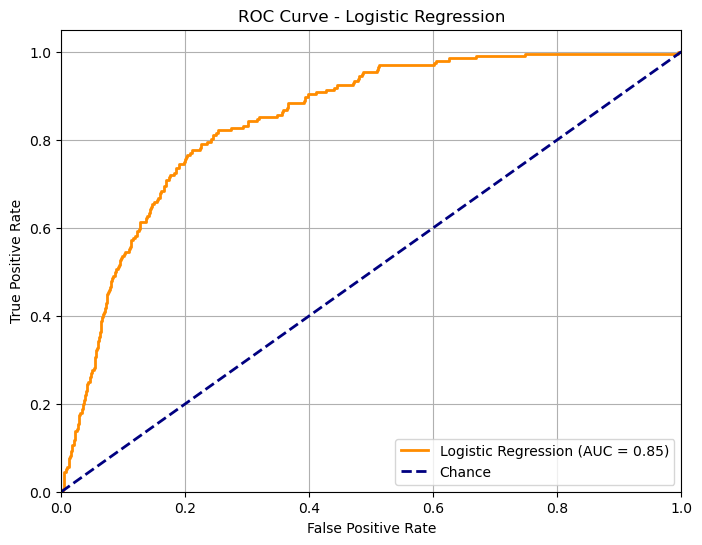

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_proba_logreg = grid_search_logistic.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Support Vector Machine Model Training With Hyperparameter Tuning

In [50]:
from sklearn.svm import SVC
svc_model = SVC(probability=True,random_state=42,class_weight='balanced')
param_grid_svc = {
    'kernel': ['rbf'],    
    'C': [0.1, 1, 10],
    'gamma': ['scale'],
    # 'shrinking': [True, False]
}
from sklearn.model_selection import GridSearchCV
grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_svc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10586dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1065b5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107349bc0>
Traceback (most recent call last

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [51]:
print("Best Parameters:", grid_search_svc.best_params_)
print("Best CV Accuracy:", grid_search_svc.best_score_)

y_predicted_svc = grid_search_svc.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_predicted_svc))
print(classification_report(y_test, y_predicted_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_svc))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.8354191598762359
Test Accuracy: 0.772073732718894
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     10654
           1       0.05      0.66      0.09       196

    accuracy                           0.77     10850
   macro avg       0.52      0.72      0.48     10850
weighted avg       0.97      0.77      0.86     10850

Confusion Matrix:
 [[8248 2406]
 [  67  129]]


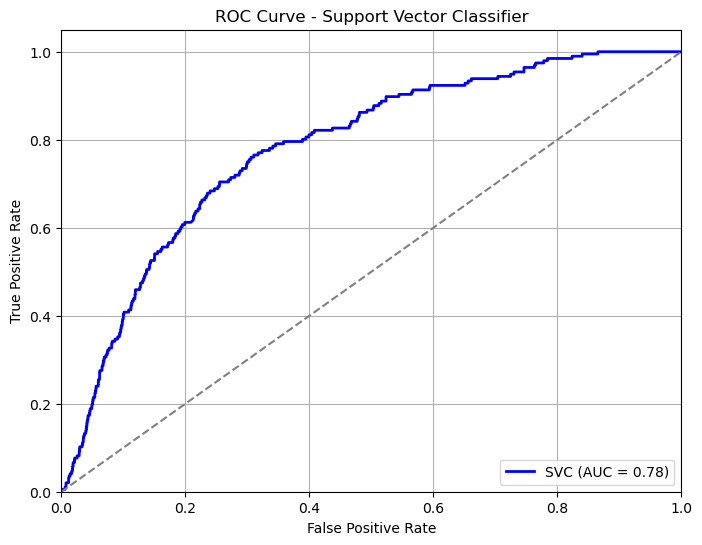

In [52]:
y_proba_svc = grid_search_svc.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='SVC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Naive Bayes Model Training With Hyperparameter Tuning

In [53]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
param_grid_naive_bayes = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search_naive_bayes = GridSearchCV(
    estimator=naive_bayes_model,
    param_grid=param_grid_naive_bayes,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_naive_bayes.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=1)

In [54]:
print("Best Params:", grid_search_naive_bayes.best_params_)
print("Best Accuracy:", grid_search_naive_bayes.best_score_)
y_predicted_nb = grid_search_naive_bayes.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_predicted_nb))
print(classification_report(y_test, y_predicted_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_nb))

Best Params: {'var_smoothing': 1e-09}
Best Accuracy: 0.766526992486221
Test Accuracy: 0.7364976958525346
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     10654
           1       0.05      0.76      0.09       196

    accuracy                           0.74     10850
   macro avg       0.52      0.75      0.47     10850
weighted avg       0.98      0.74      0.83     10850

Confusion Matrix:
 [[7842 2812]
 [  47  149]]


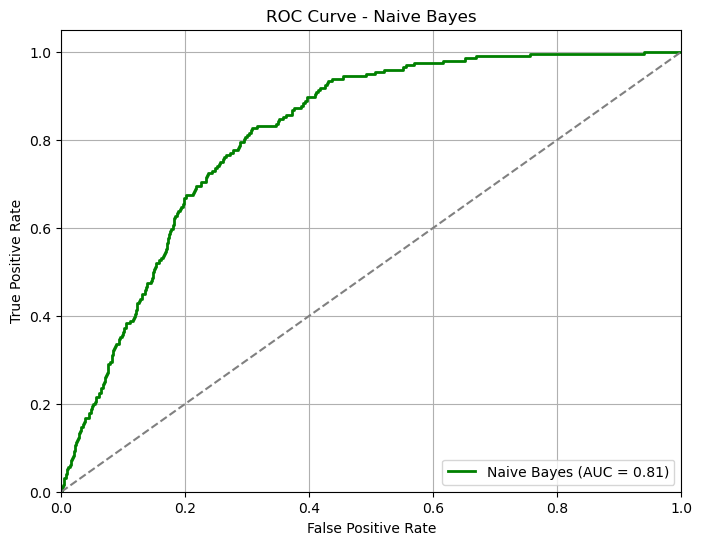

In [55]:
y_proba_nb = grid_search_naive_bayes.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K-Nearest Neighbors Model Training With Hyperparameter Tuning

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': list(range(3, 21, 2)),       
    'weights': ['uniform', 'distance'],           
    'metric': ['euclidean', 'manhattan', 'minkowski'], 
    'p': [1, 2]                                    
}
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [57]:
print("Best Params:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_knn.best_score_)

y_predicted_knn = grid_search_knn.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_predicted_knn))
print(classification_report(y_test, y_predicted_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_knn))

Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9386165940565737
Test Accuracy: 0.8849769585253456
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     10654
           1       0.05      0.30      0.09       196

    accuracy                           0.88     10850
   macro avg       0.52      0.60      0.51     10850
weighted avg       0.97      0.88      0.92     10850

Confusion Matrix:
 [[9544 1110]
 [ 138   58]]


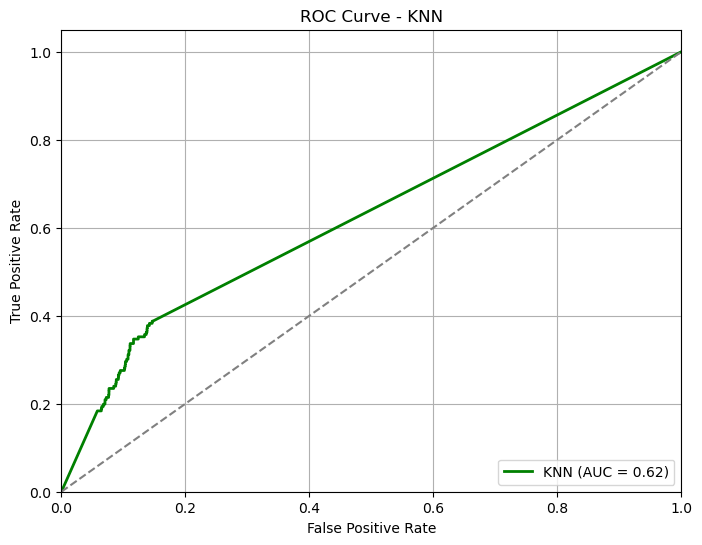

In [58]:
y_proba_knn = grid_search_knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest Model Training With Hyperparameter Tuning

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
param_grid_rf = {
    'n_estimators': [100, 200],                 
    'max_depth': [3, 5, 10],                     
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],               
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]    
}
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [60]:
y_predicted_rf = grid_search_rf.predict(X_test_scaled)
print("Best Params:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

print("Test Accuracy:", accuracy_score(y_test, y_predicted_rf))

print(classification_report(y_test, y_predicted_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_rf))

Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8702719824387509
Test Accuracy: 0.7976958525345622
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     10654
           1       0.05      0.60      0.10       196

    accuracy                           0.80     10850
   macro avg       0.52      0.70      0.49     10850
weighted avg       0.97      0.80      0.87     10850

Confusion Matrix:
 [[8537 2117]
 [  78  118]]


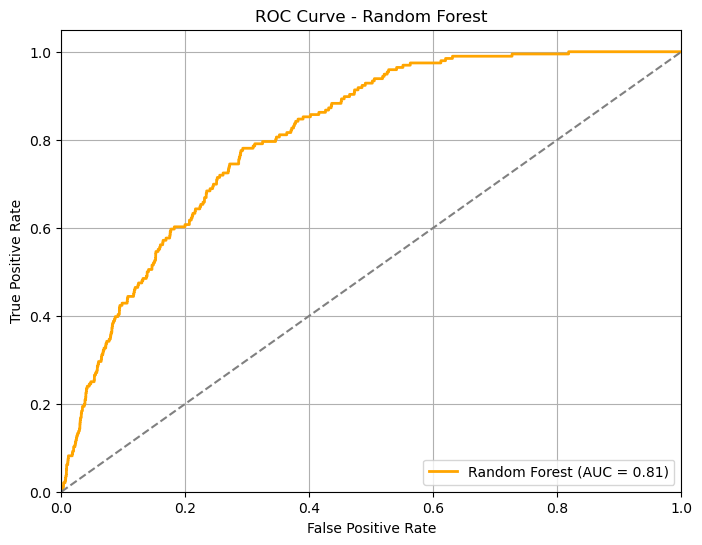

In [61]:
y_proba_rf = grid_search_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## XGBoost Model Training With Hyperparameter Tuning

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)
param_grid_xg= {
    'n_estimators': [100, 200],         
    'max_depth': [3, 5, 7],             
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],           
    'colsample_bytree': [0.8, 1.0],     
    'gamma': [0, 0.1, 0.3],            
    'min_child_weight': [1, 3, 5]      
}
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xg,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [63]:
y_predicted_xgb = grid_search_xgb.predict(X_test_scaled)
print("Best Params:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_xgb.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_predicted_xgb))
print(classification_report(y_test, y_predicted_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_xgb))


Best Params: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9573258711238296
Test Accuracy: 0.9465437788018434
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10654
           1       0.05      0.11      0.07       196

    accuracy                           0.95     10850
   macro avg       0.52      0.54      0.52     10850
weighted avg       0.97      0.95      0.96     10850

Confusion Matrix:
 [[10248   406]
 [  174    22]]


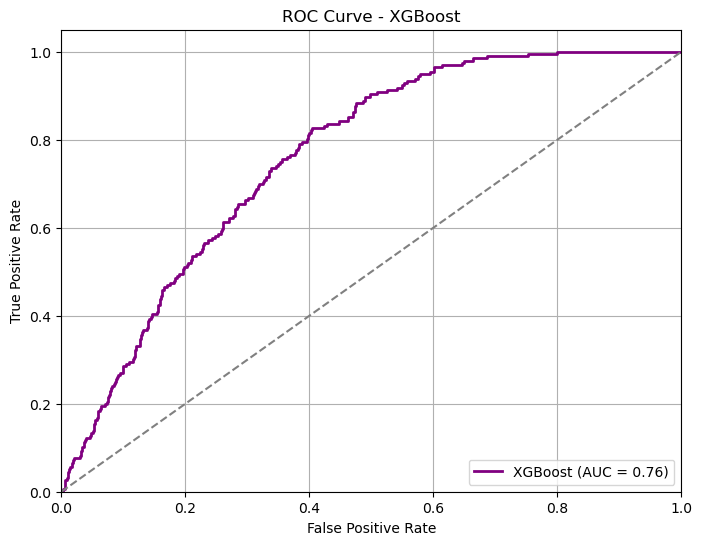

In [64]:
y_proba_xgb = grid_search_xgb.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])       
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Comparative ROC Curve Analysis

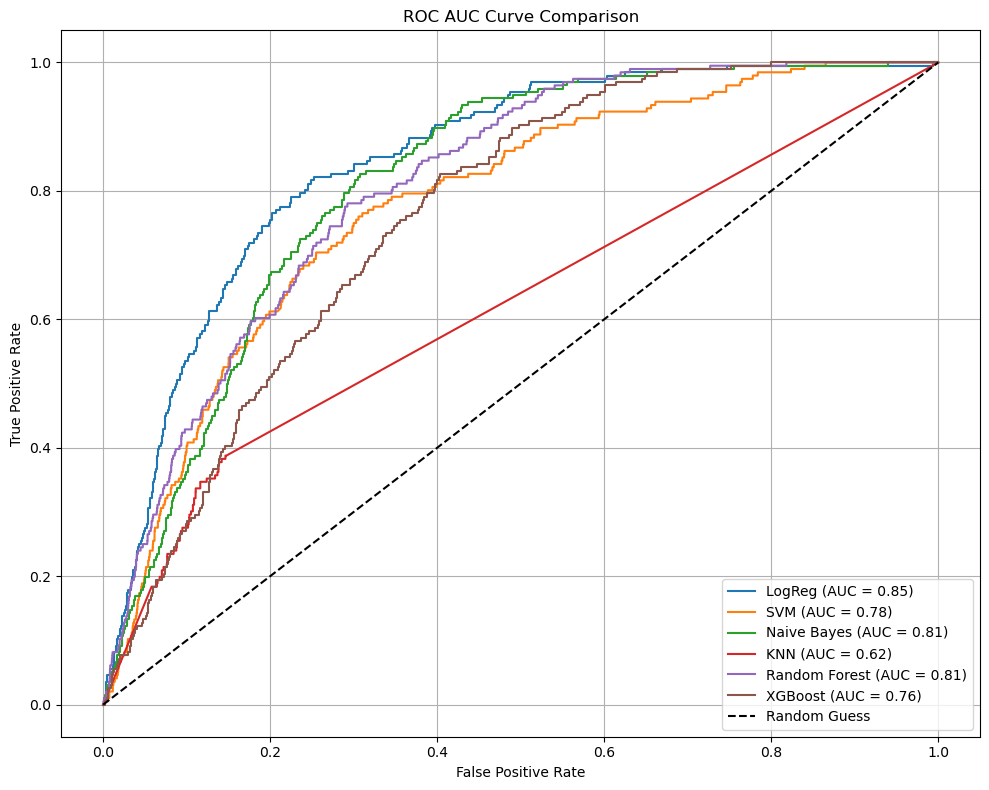

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label='LogReg (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_svc, tpr_svc, label='SVM (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparing Accuracy of Different Models

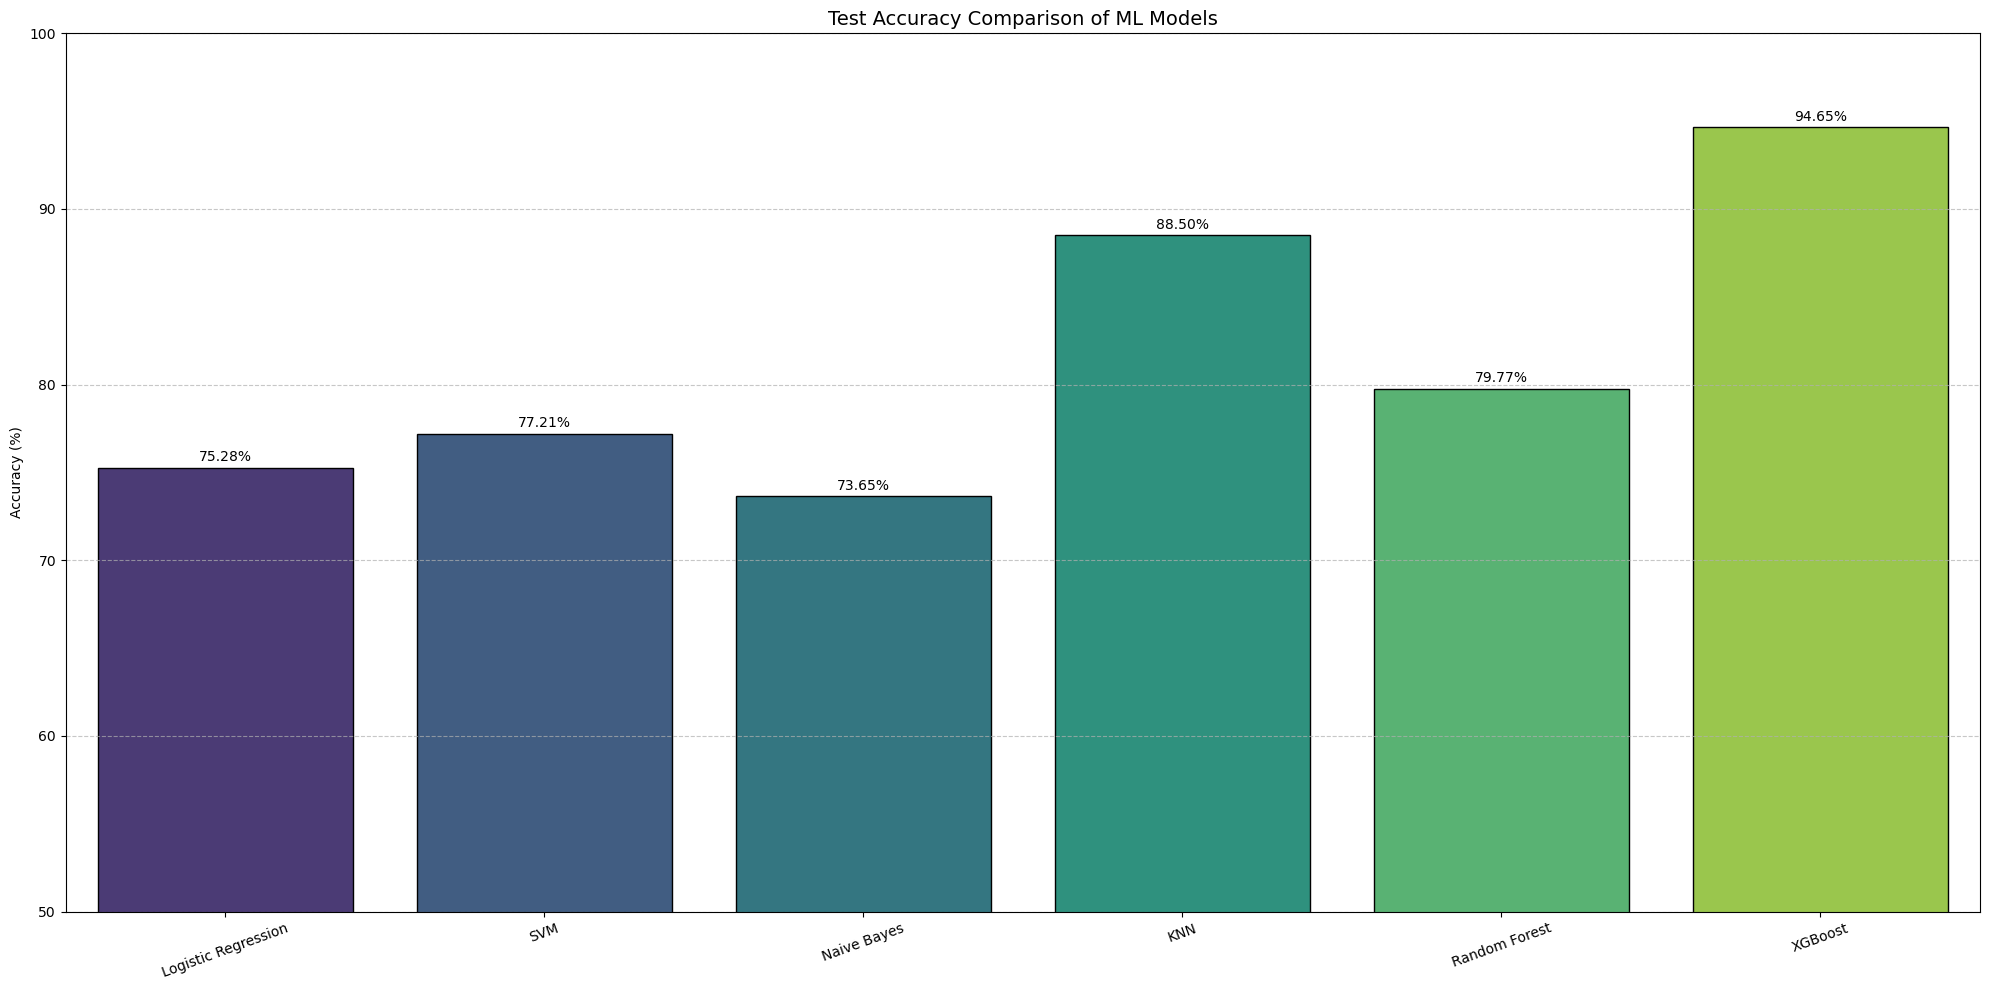

In [66]:
model_names = [
    'Logistic Regression',
    'SVM',
    'Naive Bayes',
    'KNN',
    'Random Forest',
    'XGBoost'
]

accuracies = [
    accuracy_score(y_test,y_predicted_logistic)*100,  # Logistic Regression
    accuracy_score(y_test,y_predicted_svc)*100,  # SVM
    accuracy_score(y_test,y_predicted_nb)*100,  # Naive Bayes
    accuracy_score(y_test,y_predicted_knn)*100,  # KNN
    accuracy_score(y_test,y_predicted_rf)*100,  # Random Forest
    accuracy_score(y_test,y_predicted_xgb)*100   # XGBoost
]

plt.figure(figsize=(20, 10))
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.2, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)
plt.ylim(50, 100)
sns.barplot(x=model_names, y=accuracies, palette='viridis', edgecolor='black')
plt.title('Test Accuracy Comparison of ML Models', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [67]:
pickle.dump(grid_search_logistic, open('models/logistic_model.pkl', 'wb'))
pickle.dump(grid_search_svc, open('models/svc_model.pkl', 'wb'))
pickle.dump(grid_search_naive_bayes, open('models/naive_bayes_model.pkl', 'wb'))
pickle.dump(grid_search_knn, open('models/knn_model.pkl', 'wb'))
pickle.dump(grid_search_rf, open('models/random_forest_model.pkl', 'wb'))
pickle.dump(grid_search_xgb, open('models/xgboost_model.pkl', 'wb'))

## Confusion Matrix Visualization for all models

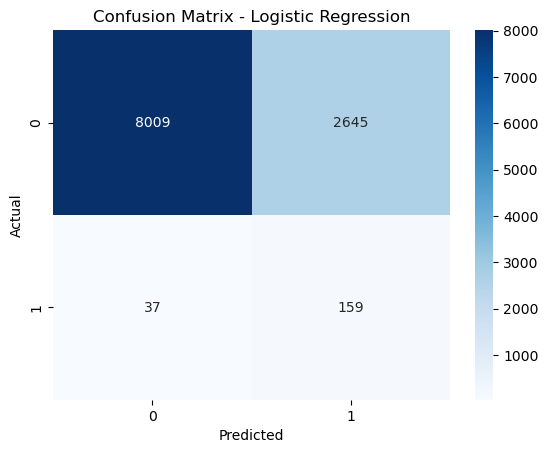

In [68]:
sns.heatmap(confusion_matrix(y_test,y_predicted_logistic), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

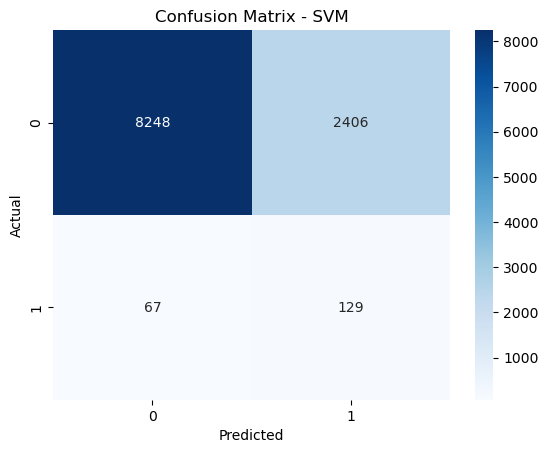

In [69]:
sns.heatmap(confusion_matrix(y_test,y_predicted_svc), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

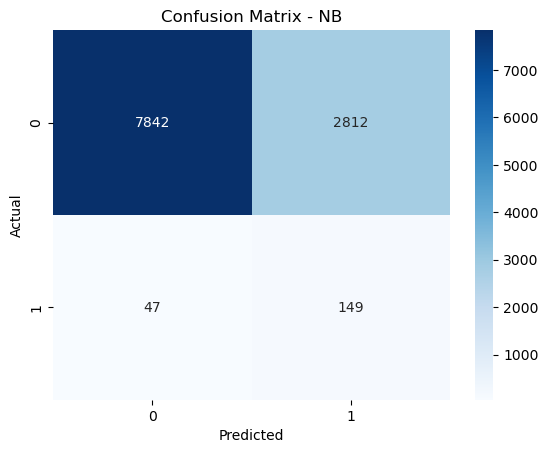

In [70]:
sns.heatmap(confusion_matrix(y_test,y_predicted_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

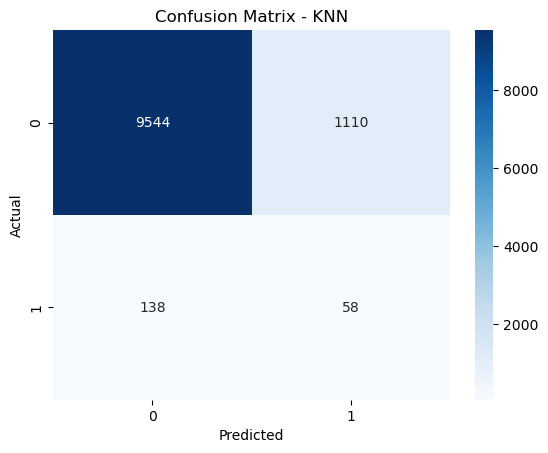

In [71]:
sns.heatmap(confusion_matrix(y_test,y_predicted_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

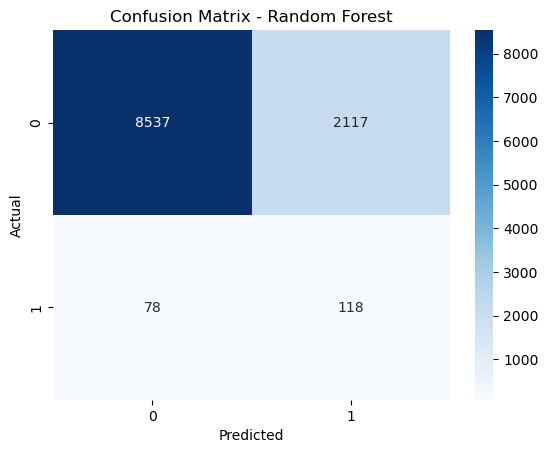

In [72]:
sns.heatmap(confusion_matrix(y_test,y_predicted_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

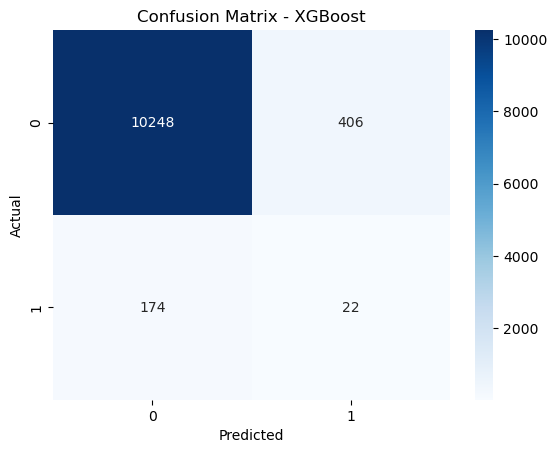

In [73]:
sns.heatmap(confusion_matrix(y_test,y_predicted_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Summary of All Model Performances

| **Model**               | **Best Hyperparameters**                                                                                                                      | **CV Accuracy** | **Test Accuracy** | **Precision (0 / 1)** | **Recall (0 / 1)** | **F1-Score (0 / 1)** | **Confusion Matrix**        |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- | --------------- | ----------------- | --------------------- | ------------------ | -------------------- | --------------------------- |
| **Logistic Regression** | `{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}`                                                                              | 0.7806          | 0.7528            | 1.00 / 0.06           | 0.75 / 0.81        | 0.86 / 0.11          | `[[8009, 2645], [37, 159]]` |
| **SVM**                 | `{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}`                                                                                                | 0.8354          | 0.7721            | 0.99 / 0.05           | 0.77 / 0.66        | 0.87 / 0.09          | `[[8248, 2406], [67, 129]]` |
| **Naive Bayes**         | `{'var_smoothing': 1e-09}`                                                                                                                    | 0.7665          | 0.7365            | 0.99 / 0.05           | 0.74 / 0.76        | 0.85 / 0.09          | `[[7842, 2812], [47, 149]]` |
| **K-Nearest Neighbors** | `{'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}`                                                                    | 0.9386          | 0.8850            | 0.99 / 0.05           | 0.90 / 0.30        | 0.94 / 0.09          | `[[9544, 1110], [138, 58]]` |
| **Random Forest**       | `{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}`            | 0.8703          | 0.7977            | 0.99 / 0.05           | 0.80 / 0.60        | 0.89 / 0.10          | `[[8537, 2117], [78, 118]]` |
| **XGBoost**             | `{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}` | 0.9573          | **0.9465**        | 0.98 / 0.05           | 0.96 / 0.11        | 0.97 / 0.07          | `[[10248, 406], [174, 22]]` |


## Conclusion

This study provides a comprehensive comparative analysis of six classical supervised machine learning algorithms—Logistic Regression, Support Vector Machine (SVM), Naïve Bayes, k-Nearest Neighbors (k-NN), Random Forest, and XGBoost—for stroke prediction using a real-world healthcare dataset.

The evaluation was carried out using hyperparameter tuning with cross-validation and further validated on unseen test data. Each model's performance was assessed using multiple metrics, including accuracy, precision, recall, F1-score, and confusion matrices, providing a holistic view of their strengths and limitations.

📊 Key Findings

XGBoost achieved the highest test accuracy of 94.65%, showcasing its strong ability to model complex patterns in data. However, its recall for stroke cases remained low (11%), which is concerning in a healthcare context.

Random Forest also performed strongly with a test accuracy of 79.76%, offering better recall (60%) for the minority class, making it a balanced and reliable option.

k-NN showed impressive overall accuracy (88.50%), but suffered from low recall (30%) for stroke detection, indicating limited effectiveness on rare events.

Logistic Regression, with a test accuracy of 75.28%, delivered high recall (81%) for stroke cases despite extremely low precision (6%), making it useful for flagging potential cases even with noisy predictions.

Naïve Bayes achieved 73.65% accuracy with 76% recall, showing robustness in probabilistic classification even under class imbalance.

SVM offered 77.21% accuracy and 66% recall, balancing decision boundary precision with a moderate ability to detect stroke cases.

⚠️ Class Imbalance Consideration
A major limitation observed was the severe class imbalance in the dataset, where stroke cases form a very small fraction of the total data. This imbalance caused most models—especially XGBoost and KNN—to prioritize the majority class, resulting in poor recall for stroke detection.

To mitigate this, techniques like:

SMOTE (Synthetic Minority Oversampling Technique)

Class weighting

Cost-sensitive learning

were employed. These significantly affect model performance, particularly for real-world clinical deployment, where false negatives (missed strokes) can have life-threatening consequences.

✅ Final Remarks
While XGBoost stood out in terms of raw predictive accuracy, models like Logistic Regression and Random Forest provided better recall for the minority class, which is crucial in stroke prediction tasks. This study emphasizes that accuracy is not the sole metric of success in imbalanced healthcare datasets. Instead, recall and F1-score for stroke cases must be prioritized to ensure clinically actionable results.

In future work, combining these classical models with advanced imbalance-handling techniques or building ensemble systems that maximize both precision and recall could significantly enhance stroke prediction systems for real-world applications.